## 散出するワード
- RNN：Reccurent（再帰）NN。時系列、つまり順序に意味のあるデータを学習させるのに適したニューラルネットワーク。主に自然言語処理や時系列データで採用されている。順序データの学習を行うためにニューロンの出力を自分の次の入力に足して処理していくのが特徴
  - [RNN概要の参考画像](https://qiita-user-contents.imgix.net/https%3A%2F%2Fqiita-image-store.s3.amazonaws.com%2F0%2F107310%2F1907ad99-0e89-cf14-0d77-d38e4ee7d7b7.jpeg?ixlib=rb-1.2.2&auto=format&gif-q=60&q=75&w=1400&fit=max&s=41426f057c15b5a89463635a7a3b5322)
  - [画像の概要生成_参考画像](https://qiita-user-contents.imgix.net/https%3A%2F%2Fqiita-image-store.s3.amazonaws.com%2F0%2F107310%2F266aa27f-36ac-33e9-cb61-e006115a79c3.png?ixlib=rb-1.2.2&auto=format&gif-q=60&q=75&w=1400&fit=max&s=cee8d02ba0d0903d5bb5e1d76946efee)
- 活用事例
  - 文章生成や機械翻訳。CNNと組み合わせた画像＊文章生成など

- 発展
  - RNNは「1個の入力データ群とすることのできる1回のデータ量を多くすることが難しいという欠点」がある
  - 改良されたのが「LSTM」（Long Short-Term Memory）
  - LSTM の構造が複雑だったのでその改良として提案されているのが「GRU」（Gated Recurrent Unit）



## 【問題1】公式チュートリアルモデルを分担して実行
TensorFLowの公式チュートリアルモデルを分担して実行してください。


以下の中から1人ひとつ選び実行し、その結果を簡単に発表してください。


models/tutorials at master · tensorflow/models

## 【目的】
このテキスト分類チュートリアルでは、感情分析のために IMDB 映画レビュー大型データセット を使って リカレントニューラルネットワーク を訓練します。
IMDB 映画レビュー大型データセットは二値分類データセットです。すべてのレビューは、好意的(positive) または 非好意的(negative) のいずれかの感情を含んでいます。

In [3]:
# !pip install -q tf-nightly
import tensorflow_datasets as tfds
import tensorflow as tf

In [4]:
# loss描画用関数
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric]) 
  plt.show()

### 入力パイプラインの設定
IMDB 映画レビュー大型データセットは二値分類データセットです。すべてのレビューは、好意的(positive) または 非好意的(negative) のいずれかの感情を含んでいます。

TFDS を使ってこのデータセットをダウンロードします。

- [TFDS](https://www.tensorflow.org/datasets)
- [データセットリスト](https://www.tensorflow.org/datasets/catalog/overview) 約50種類くらい


In [5]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True,
                          as_supervised=True)
train_examples, test_examples = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteDTUJS7/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteDTUJS7/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteDTUJS7/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [6]:
encoder = info.features['text'].encoder

In [7]:
print('Vocabulary size: {}'.format(encoder.vocab_size))  # 単語のユニーク数

Vocabulary size: 8185


In [8]:
# encode-decodeのテストコード
sample_string = 'Hello TensorFlow.'

encoded_string = encoder.encode(sample_string)
print('Encoded string is {}'.format(encoded_string))

original_string = encoder.decode(encoded_string)
print('The original string: "{}"'.format(original_string))


Encoded string is [4025, 222, 6307, 2327, 4043, 2120, 7975]
The original string: "Hello TensorFlow."


- encode部分
  - 読み込んだビックデータテキストが各単語をencode（ベクトル化）したリスト（だと思われる。）[4025, 222, 6307, 2327, 4043, 2120, 7975]

- decode部分
  - encodeベクトルを単語に戻してあげている。

In [9]:
# 個人的に実践
sample_string2 = "This movie is cool."   # ありそうな文章
sample_string3 = "I have a pen. I have an apple."    # 文章2つ, 区切り"."
sample_string4 = "Leonardo DiCaprio, Ken Watanabe, Jason Statham"   # 固有名詞, 区切り","

encoded_string2 = encoder.encode(sample_string2)
encoded_string3 = encoder.encode(sample_string3)
encoded_string4 = encoder.encode(sample_string4)
print("---------encode------------")
print('[This movie is cool.]Encoded string is {}'.format(encoded_string2))
print('[I have a pen. I have an apple.]Encoded string is {}'.format(encoded_string3))
print('[Leonardo DiCaprio, Ken Watanabe, Jason Statham]Encoded string is {}'.format(encoded_string4))

original_string2 = encoder.decode(encoded_string2)
original_string3 = encoder.decode(encoded_string3)
original_string4 = encoder.decode(encoded_string4)
print()
print("---------decode------------")
print('[This movie is cool.]The original string: "{}"'.format(original_string2))
print('[I have a pen. I have an apple.]The original string: "{}"'.format(original_string3))
print('[Leonardo DiCaprio, Ken Watanabe, Jason Statham]The original string: "{}"'.format(original_string4))


---------encode------------
[This movie is cool.]Encoded string is [62, 27, 9, 2724, 7975]
[I have a pen. I have an apple.]Encoded string is [12, 31, 4, 1451, 3, 12, 31, 41, 2869, 8030, 7975]
[Leonardo DiCaprio, Ken Watanabe, Jason Statham]Encoded string is [4229, 1073, 222, 1266, 2758, 2584, 2, 3238, 7961, 6343, 2078, 368, 2, 4463, 1454, 622, 839]

---------decode------------
[This movie is cool.]The original string: "This movie is cool."
[I have a pen. I have an apple.]The original string: "I have a pen. I have an apple."
[Leonardo DiCaprio, Ken Watanabe, Jason Statham]The original string: "Leonardo DiCaprio, Ken Watanabe, Jason Statham"


In [10]:
assert original_string == sample_string


In [11]:
for index in encoded_string:
  print('{} ----> {}'.format(index, encoder.decode([index])))

4025 ----> Hell
222 ----> o 
6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
7975 ----> .


In [12]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [13]:
train_dataset = (train_examples
                 .shuffle(BUFFER_SIZE)
                 .padded_batch(BATCH_SIZE, padded_shapes=([None],[])))

test_dataset = (test_examples
                .padded_batch(BATCH_SIZE,  padded_shapes=([None],[])))

In [ ]:
# LSTM1層
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # ポジネガの2値分類のため、最終出力は1
])

## モデルの作成
tf.keras.Sequential モデルを構築しましょう。最初に Embedding レイヤーから始めます。Embedding レイヤーは単語一つに対して一つのベクトルを収容します。呼び出しを受けると、Embedding レイヤーは単語のインデックスのシーケンスを、ベクトルのシーケンスに変換します。これらのベクトルは訓練可能です。（十分なデータで）訓練されたあとは、おなじような意味をもつ単語は、しばしばおなじようなベクトルになります。

このインデックス参照は、ワンホットベクトルを tf.keras.layers.Dense レイヤーを使って行うおなじような演算に比べてずっと効率的です。

リカレントニューラルネットワーク（RNN）は、シーケンスの入力を要素を一つずつ扱うことで処理します。RNN は、あるタイムステップでの出力を次のタイムステップの入力へと、次々に渡していきます。

RNN レイヤーとともに、tf.keras.layers.Bidirectional ラッパーを使用することができます。このラッパーは、入力を RNN 層の順方向と逆方向に伝え、その後出力を結合します。これにより、RNN は長期的な依存関係を学習できます。

### Embedding  [[tensorページ]](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding)
- [参考記事](https://qiita.com/9ryuuuuu/items/e4ee171079ffa4b87424)
- 単語をベクトル化する

### Bidirectional  [[tensorページ]](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Bidirectional)
- [参考記事1(BidirectionalRNN (双方向RNN）](https://nzw0301.github.io/2017/01/kerasbidirectional),  [Qlita記事](https://qiita.com/gacky01/items/f2537468b7381269588b)
- 意味としてはBidirectionalRNN (双方向RNN）
- [画像](https://qiita-user-contents.imgix.net/https%3A%2F%2Fqiita-image-store.s3.amazonaws.com%2F0%2F289661%2F2419f8a3-7516-65ae-cbc3-a1d7888c7296.png?ixlib=rb-1.2.2&auto=format&gif-q=60&q=75&w=1400&fit=max&s=6ce83e8b6c880243b0943ad358785dc6)

In [18]:
# Embeddingについて
# 学習共有時にお伝えしやすいサンプルコード

import numpy as np
from numpy.random import seed
from tensorflow import keras
# from tensorflow import set_random_seed

# 毎回の計算結果を同一にするための設定
# seed(1)
# set_random_seed(2)

"""
文章1: Hope to see you soon.(0 1 2 3 4) ()内はベクトル
文章2: Nice to see you again.(5 1 2 3 6)　　()内はベクトル
"""
input_array = np.array([[0, 1, 2, 3, 4],[5, 1, 2, 3, 6]])
vocab_size = 7

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 2))  # vocab_sizeは単語のユニーク数
model.compile(optimizer='rmsprop', loss='mse')

output_array = model.predict(input_array)
print(output_array)

[[[ 0.01442817 -0.03924941]
  [-0.03038896  0.00334126]
  [ 0.00873965 -0.02641654]
  [-0.03397995 -0.00971828]
  [-0.03640746  0.03036437]]

 [[ 0.04680036  0.04421845]
  [-0.03038896  0.00334126]
  [ 0.00873965 -0.02641654]
  [-0.03397995 -0.00971828]
  [ 0.0336954   0.04651159]]]


In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),  #2値分類のため、BinaryCrossentropy
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset, 
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 765s 2s/step - loss: 0.6837 - accuracy: 0.5131 - val_loss: 0.5274 - val_accuracy: 0.7453
Epoch 2/10
391/391 [==============================] - 806s 2s/step - loss: 0.4283 - accuracy: 0.8126 - val_loss: 0.3510 - val_accuracy: 0.8484
Epoch 3/10
391/391 [==============================] - 809s 2s/step - loss: 0.2670 - accuracy: 0.8927 - val_loss: 0.3442 - val_accuracy: 0.8620
Epoch 4/10
391/391 [==============================] - 812s 2s/step - loss: 0.2109 - accuracy: 0.9213 - val_loss: 0.3432 - val_accuracy: 0.8646
Epoch 5/10
391/391 [==============================] - 810s 2s/step - loss: 0.1791 - accuracy: 0.9368 - val_loss: 0.3552 - val_accuracy: 0.8682
Epoch 6/10
391/391 [==============================] - 814s 2s/step - loss: 0.1631 - accuracy: 0.9405 - val_loss: 0.3452 - val_accuracy: 0.8510
Epoch 7/10
391/391 [==============================] - 816s 2s/step - loss: 0.1417 - accuracy: 0.9521 - val_loss: 0.3677 - val_accuracy: 0.8672

## 約3時間…

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

391/391 [==============================] - 180s 460ms/step - loss: 0.4362 - accuracy: 0.8539
Test Loss: 0.43623602390289307
Test Accuracy: 0.8539199829101562


In [20]:
def pad_to_size(vec, size):
  zeros = [0] * (size - len(vec))
  vec.extend(zeros)
  return vec

In [21]:
def sample_predict(sample_pred_text, pad):
  encoded_sample_pred_text = encoder.encode(sample_pred_text)

  if pad:
    encoded_sample_pred_text = pad_to_size(encoded_sample_pred_text, 64)
  encoded_sample_pred_text = tf.cast(encoded_sample_pred_text, tf.float32)
  predictions = model.predict(tf.expand_dims(encoded_sample_pred_text, 0))

  return (predictions)



In [ ]:
# パディングなしのサンプルテキストの推論

sample_pred_text = ('The movie was cool. The animation and the graphics '
                    'were out of this world. I would recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=False)
print(predictions)

[[-0.4815464]]


In [ ]:
# パディングありのサンプルテキストの推論

sample_pred_text = ('The movie was cool. The animation and the graphics '
                    'were out of this world. I would recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=True)
print(predictions)

[[-0.41166714]]


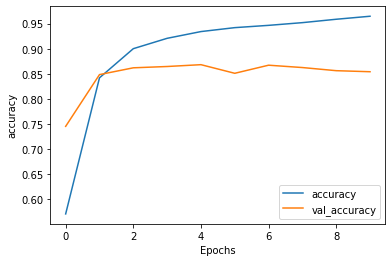

In [ ]:
plot_graphs(history, 'accuracy')

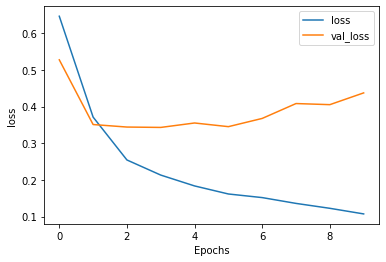

In [ ]:
plot_graphs(history, 'loss')

## とりあえずここまで

### 調査中の備忘メモ
- [Kerasで実装するSeq2Seq　－その１　日本語訓練データの準備](https://qiita.com/gacky01/items/26cd642731e3eddde60d)
> 　ところで、会話文の中には長いものもありますが、これがニューラルネットワークで定義する系列長を超える場合は、学習データに使えず、捨てざるを得なくなります。これはもったいないので、一定長より長い文章は、句点のところにセパレータを挿入して、複数の文章に分割することにしました。同一人物の単一発言が発話と応答に分かれることになりますが、そこは捨てるよりはましと、割り切ります。
- [Encoder-Decoderについて（slideshare）](https://www.slideshare.net/YusukeOda1/encoderdecoder-tis)

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),  # 変化点
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),　　# 変化点
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])



In [15]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [17]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 105s 270ms/step - loss: 0.2079 - accuracy: 0.9340 - val_loss: 0.3682 - val_accuracy: 0.8578
Epoch 2/10
391/391 [==============================] - 105s 268ms/step - loss: 0.1858 - accuracy: 0.9426 - val_loss: 0.3806 - val_accuracy: 0.8646
Epoch 3/10
391/391 [==============================] - 105s 269ms/step - loss: 0.1611 - accuracy: 0.9534 - val_loss: 0.4242 - val_accuracy: 0.8625
Epoch 4/10
391/391 [==============================] - 106s 270ms/step - loss: 0.1429 - accuracy: 0.9615 - val_loss: 0.4355 - val_accuracy: 0.8578
Epoch 5/10
391/391 [==============================] - 105s 270ms/step - loss: 0.1340 - accuracy: 0.9653 - val_loss: 0.4527 - val_accuracy: 0.8562
Epoch 6/10
391/391 [==============================] - 105s 270ms/step - loss: 0.1203 - accuracy: 0.9710 - val_loss: 0.4727 - val_accuracy: 0.8526
Epoch 7/10
391/391 [==============================] - 105s 270ms/step - loss: 0.1140 - accuracy: 0.9720 - val_loss: 0.5231 -

In [18]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

391/391 [==============================] - 41s 104ms/step - loss: 0.5604 - accuracy: 0.8467
Test Loss: 0.5603680610656738
Test Accuracy: 0.8467199802398682


In [22]:
# パディングなしのサンプルテキストの推論

sample_pred_text = ('The movie was not good. The animation and the graphics '
                    'were terrible. I would not recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=False)
print(predictions)

[[-2.8156276]]


In [23]:
# パディングありのサンプルテキストの推論

sample_pred_text = ('The movie was not good. The animation and the graphics '
                    'were terrible. I would not recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=True)
print(predictions)



[[-3.8014944]]


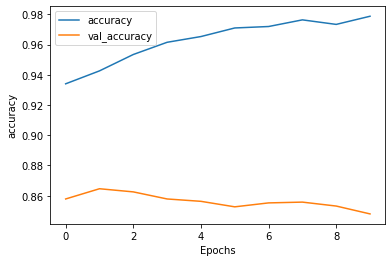

In [24]:
plot_graphs(history, 'accuracy')

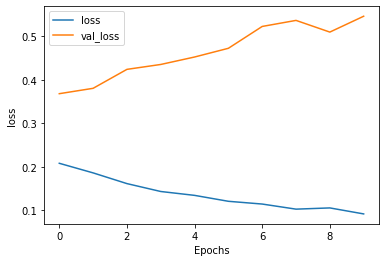

In [25]:
plot_graphs(history, 'loss')

## まとめ
- Kerasの使い方に触れ、あくまでRNNやLSTMの理解は浅くても、ビックデータさえあれば動かすことが出来そうという感覚。
- 今回はポジネガ分類問題だったが、調べていくとRNNまたはLSTMは文章生成などの技術の方が優れていそうなので、そちらのチュートリアルも試しておきたい。

## 問題2は実施していません。